In [593]:
from collections import defaultdict
from itertools import product
from pathlib import Path
from pprint import pprint

import numpy as np
import pandas as pd
import yaml
from matplotlib import pyplot as plt
from scipy.stats import wilcoxon

PRED_PATH = Path().resolve() / "ax_runs" / "prediction"
STFS_PATH = Path().resolve() / "ax_runs" / "st_selection"
PLOT_PATH = Path().resolve() / "plots"

##### Plot 1: Regression performance

In [594]:
skip_methods = {}

skip_methods["regr"] = [
    # "fastel",
    # "nn",
    # We're not trying to propose these norms, so they just confuse matters
    "jp_linear_rf_inf",  # this one does very well on classification
    "jp_linear_gb_inf",  # This one does not do well in either case
    "jp_linear_vor_inf",
    "jp_linear_linforest_inf",
    "jp_const_vor_l1",
    "jp_linear_vor_l1",
    "jp_const_linforest_l1",
    "jp_linear_linforest_l1",
    "jp_const_gb_l1",
    "jp_linear_gb_l1",
    "jp_const_rf_l1",
    "jp_linear_rf_l1",
    # Want to focus on our proposed leaf/norm combinations
    "jp_linear_gb_nn",
    "jp_const_gb_l2L2",
    # Adding linforest distracts from the main point
    # "jp_linear_linforest_l2L2",
    # "jp_linear_linforest_l2",
    "jp_const_linforest_l2L2",
    "jp_const_linforest_l2",
    # "lf",
    # adding et distracts from the main point
    "et",
    # adding these distracts from the main point
    "rf_fr",
    "gb_fr",
    "xgboost",
    "lgbm",
    # Skipping because not relevant to the rest of the paper
    "jp_linear_vor_l2",
    "jp_linear_vor_l2L2",
    "jp_const_vor_l2",
    "jp_const_vor_l2L2",
    # # not done yet
    # "jp_linear_linforest_l21",
    # "jp_linear_gb_l21",
    # "jp_linear_rf_l21",
]

skip_methods["class"] = [
    # "fastel",
    # "nn",
    # We're not trying to propose these norms, so they just confuse matters
    "jp_linear_rf_inf",  # this one does very well on classification
    "jp_linear_gb_inf",  # This one does not do well in either case
    "jp_linear_vor_inf",
    "jp_linear_linforest_inf",
    "jp_const_vor_l1",
    "jp_linear_vor_l1",
    "jp_const_linforest_l1",
    "jp_linear_linforest_l1",
    "jp_const_gb_l1",
    "jp_linear_gb_l1",
    "jp_const_rf_l1",
    "jp_linear_rf_l1",
    # Want to focus on our proposed leaf/norm combinations
    "jp_linear_gb_nn",
    "jp_const_gb_l2L2",
    # Adding linforest distracts from the main point
    # "jp_linear_linforest_l2L2",
    # "jp_linear_linforest_l2",
    "jp_const_linforest_l2L2",
    "jp_const_linforest_l2",
    # "lf",
    # adding et distracts from the main point
    "et",
    # adding these distracts from the main point
    "rf_fr",
    "gb_fr",
    "xgboost",
    "lgbm",
    # Skipping because not relevant to the rest of the paper
    "jp_linear_vor_l2",
    "jp_linear_vor_l2L2",
    "jp_const_vor_l2",
    "jp_const_vor_l2L2",
    # not done yet
    "jp_linear_linforest_l21",
    "jp_linear_gb_l21",
    "jp_linear_rf_l21",
]

skip_methods["both"] = list(set(skip_methods["regr"]) & set(skip_methods["class"]))

In [595]:
# load regression results
reg_res = defaultdict(lambda: defaultdict(dict))
alt_reg_res = defaultdict(lambda: defaultdict(dict))

for task_type in PRED_PATH.iterdir():
    for method_dir in task_type.iterdir():
        if method_dir.is_dir():
            for dataset_dir in method_dir.iterdir():
                if dataset_dir.is_dir():
                    fp = dataset_dir / "metadata.yaml"

                    if not fp.exists():
                        continue

                    with open(fp, "r") as f:
                        tmp = yaml.safe_load(f)

                    if (
                        method_dir.name in skip_methods[task_type.name]
                        or method_dir.name in skip_methods["both"]
                    ):
                        alt_reg_res[task_type.name][method_dir.name][
                            dataset_dir.name
                        ] = tmp
                    else:
                        reg_res[task_type.name][method_dir.name][dataset_dir.name] = tmp


reg_res = {k: dict(v) for k, v in reg_res.items()}
alt_reg_res = {k: dict(v) for k, v in alt_reg_res.items()}

In [596]:
list(reg_res["class"].keys())

['jp_const_rf_l2',
 'jp_linear_rf_l2L2',
 'jp_const_gb_l2',
 'lf',
 'jp_linear_linforest_l2L2',
 'ridge',
 'cb',
 'jp_linear_linforest_l2',
 'jp_linear_gb_l2L2',
 'jp_linear_gb_l2',
 'jp_linear_rf_l2',
 'rf',
 'nn',
 'gb']

In [597]:
{k: len(v) for k, v in reg_res["class"].items()}

{'jp_const_rf_l2': 56,
 'jp_linear_rf_l2L2': 56,
 'jp_const_gb_l2': 56,
 'lf': 56,
 'jp_linear_linforest_l2L2': 56,
 'ridge': 56,
 'cb': 58,
 'jp_linear_linforest_l2': 56,
 'jp_linear_gb_l2L2': 56,
 'jp_linear_gb_l2': 56,
 'jp_linear_rf_l2': 56,
 'rf': 57,
 'nn': 56,
 'gb': 58}

In [598]:
{k: len(v) for k, v in reg_res["class"].items()}

{'jp_const_rf_l2': 56,
 'jp_linear_rf_l2L2': 56,
 'jp_const_gb_l2': 56,
 'lf': 56,
 'jp_linear_linforest_l2L2': 56,
 'ridge': 56,
 'cb': 58,
 'jp_linear_linforest_l2': 56,
 'jp_linear_gb_l2L2': 56,
 'jp_linear_gb_l2': 56,
 'jp_linear_rf_l2': 56,
 'rf': 57,
 'nn': 56,
 'gb': 58}

In [599]:
# only keep datasets shared by all methods
shared_datasets = defaultdict(lambda: defaultdict(set))

for task_type, methods in reg_res.items():
    for method, datasets in methods.items():
        for contains_categorical in [True, False, "postprocessed"]:
            keys = [
                k
                for k, v in datasets.items()
                if v["contains_categorical"] == contains_categorical
            ]

            if not shared_datasets[task_type][contains_categorical]:
                shared_datasets[task_type][contains_categorical] = set(keys)
            else:
                shared_datasets[task_type][contains_categorical] &= set(keys)

shared_datasets = {k: dict(v) for k, v in shared_datasets.items()}

new_reg_res = defaultdict(lambda: defaultdict(dict))

for task_type, methods in reg_res.items():
    for method, datasets in methods.items():
        for contains_categorical in [True, False, "postprocessed"]:
            new_reg_res[task_type][method].update(
                {
                    k: v
                    for k, v in datasets.items()
                    if k in shared_datasets[task_type][contains_categorical]
                }
            )

reg_res = {k: dict(v) for k, v in new_reg_res.items()}

In [600]:
def plot_strip(
    reg_res: dict,
    ax,
    colors: dict | None = None,
    jitter: float = 0.2,
    random_state: int = 0,
    # plot_kwargs: dict = {},
    scatter_kwargs: dict = {},
    only_classification: bool = False,
    only_continuous: bool = False,
    # figsize: tuple | None = None,
):
    """
    Create a strip plot based on the list of y-values.
    """
    x_values = []
    y_labels = []

    def score(vv: dict, only_classification: bool):
        # print(vv)
        if only_classification:
            return vv["metadata"]["test"]["zo_loss"]
        else:
            return vv["test_score"] / vv["dummy_loss"]

    rescaled_res = {
        k: {
            kk: score(vv, only_classification)
            for kk, vv in v.items()
            if not (
                only_continuous
                and vv["contains_categorical"] in [True, "postprocessed"]
            )
        }
        for k, v in reg_res.items()
    }

    rescaled_res = {k: v for k, v in rescaled_res.items() if len(v) > 0}

    median_res = {k: np.median(list(v.values())) for k, v in rescaled_res.items()}

    sorted_dict = {
        k: rescaled_res[k] for k in sorted(median_res, key=median_res.get)[::-1]
    }

    if colors is None:
        colors = [plt.cm.tab10(i) for i in range(len(sorted_dict))]
    else:
        colors = [plt.cm.tab20(colors[k]) for k in sorted_dict.keys()]

    for k, v in sorted_dict.items():
        x_values.append(v.values())
        y_labels.append(k)

    for x_idx, val in enumerate(x_values):
        np.random.seed(random_state)
        # Apply jitter to x-axis positions
        y_values = [x_idx + np.random.uniform(-jitter, jitter) for _ in val]
        ax.scatter(val, y_values, c=[colors[x_idx]] * len(val), **scatter_kwargs)

    x_lim = (0, max(ax.get_xlim()[1], 1.2))
    x_lim = (0, min(x_lim[1], 1 if only_classification else 1.5))

    for x_idx, val in enumerate(x_values[:-1]):
        ax.hlines(x_idx + 1 / 2, *x_lim, color="k", alpha=0.25)

    print("num_datasets:", len(list(rescaled_res.values())[0]))

    # plot vertical line for median for each model
    medians = [np.median(list(val)) for val in x_values]
    for x_value, median in zip(range(len(x_values)), medians):
        ax.vlines(median, x_value - 1 / 2, x_value + 1 / 2, color="k")

    ax.set_xlim(x_lim)

    print({k: v for k, v in zip(y_labels, medians)})

    ax.set_yticks(range(len(y_labels)))
    ax.tick_params(pad=80, axis="y")
    ax.set_yticklabels(y_labels, ha="left")

    if not only_classification:
        ax.vlines(1, -1, len(y_labels) + 1, color="k", linestyle="--")

    ax.set_ylim(-1 / 2, len(y_labels) - 1 / 2)

    ax.set_xlabel("Normalized MSE" if not only_classification else "0/1 Loss")

    # plt.tight_layout()

    return ax, medians, len(list(rescaled_res.values())[0]), list(sorted_dict.keys())


def compare_methods(method1, method2, pred_type):
    reg_res1 = reg_res[pred_type][method1]
    reg_res2 = reg_res[pred_type][method2]

    assert len(reg_res1) == len(reg_res2)

    method1, method2 = [], []

    for k, v in reg_res1.items():
        if k in reg_res2:
            v2 = reg_res2[k]

            if pred_type == "class":
                method1.append(v["metadata"]["test"]["zo_loss"])
                method2.append(v2["metadata"]["test"]["zo_loss"])
            else:
                method1.append(v["test_score"] / v["dummy_loss"])
                method2.append(v2["test_score"] / v2["dummy_loss"])

    return wilcoxon(method1, method2, alternative="less", method="exact").pvalue

In [601]:
list(reg_res["class"].keys())

['jp_const_rf_l2',
 'jp_linear_rf_l2L2',
 'jp_const_gb_l2',
 'lf',
 'jp_linear_linforest_l2L2',
 'ridge',
 'cb',
 'jp_linear_linforest_l2',
 'jp_linear_gb_l2L2',
 'jp_linear_gb_l2',
 'jp_linear_rf_l2',
 'rf',
 'nn',
 'gb']

In [615]:
part_colors = {
    "rf": 0,
    "gb": 2,
    "vor": 4,
    "cb": 6,
    "ridge": 8,
    "et": 10,
    "nn": 12,
    "fastel": 14,
    "xgboost": 16,
    "lf": 18,
    "linforest": 18,
}

part_name = {
    "rf": "RF",
    "gb": "GB",
    "vor": "Vor",
    "cb": "CatBoost",
    "lf": "LF",
    "ridge": "Ridge",
    "et": "ET",
    "nn": "NN",
    "fastel": "FASTEL",
    "xgboost": "XGB",
    "linforest": "LF",
}

penalty_name = {
    "nn": "Nuclear Norm",
    "l1": "$\ell_1$",
    "l2": "F",
    "l21": "$\ell_{2,1}$",
    "l2L2": "$\mathcal{L}$",
    "inf": "$\ell_\infty$",
}

# cell_name = {
#     "const": "C",
#     "linear": "L",
# }


def rename_and_color(reg_res: dict) -> tuple[dict, dict]:
    method_colors = {}
    method_names = {}

    for method in reg_res:
        split = method.split("_")

        match split:
            case (name,):  # raw model
                method_names[method] = f"{part_name[name]}"
                method_colors[method] = part_colors[name] + 1
            case name, _:  # friedman refitting
                method_names[method] = f"{part_name[name]} (Friedman)"
                method_colors[method] = part_colors[name]
            case _, cell, name, penalty:  # joplen methods
                if cell == "linear":
                    method_names[method] = (
                        f"{part_name[name]} JOPLEN: {penalty_name[penalty]}"
                    )
                else:
                    method_names[method] = (
                        f"{part_name[name]} GR: {penalty_name[penalty]}"
                    )
                method_colors[method] = part_colors[name]
            case _:
                raise ValueError(f"Unknown method {method}")

    return method_names, method_colors

In [616]:
def scatter_pmlb(ds_type: str, ax=None):
    method_renamer, colors = rename_and_color(reg_res[ds_type])
    only_classification = ds_type == "class"
    no_ax = ax is None

    filtered_res = {
        k: v for k, v in reg_res[ds_type].items() if k not in skip_methods[ds_type]
    }

    if no_ax:
        figsize = (6, len(filtered_res) / 3)
        fig, ax = plt.subplots(figsize=figsize)

    ax, medians, _, sorted_methods = plot_strip(
        filtered_res,
        ax,
        colors,
        scatter_kwargs={"alpha": 0.5, "s": 20},
        only_classification=only_classification,
        only_continuous=False,
        # figsize=(6, 1 / 3 * len(filtered_res)),
    )

    # annotate the smallest median
    smallest_median = np.min(medians)
    offset = len(medians) - 1 / 3
    font_params = {
        "color": "black",
        "weight": "normal",
        "size": 8,
        "annotation_clip": False,
        "horizontalalignment": "center",
        "transform": ax.transAxes,
    }

    ax.annotate("Median Performance", xy=(smallest_median, offset), **font_params)

    if not only_classification:
        ax.annotate("Naive Performance", xy=(1, offset), **font_params)

    sorted_labels = [v.get_text() for v in ax.get_yticklabels()]
    ax.set_yticklabels([method_renamer[k] for k in sorted_labels])

    if no_ax:
        plt.tight_layout()

        plt.savefig(PLOT_PATH / f"paper_{ds_type}_strip.pdf")

        plt.show()

    return sorted_methods

num_datasets: 91
{'ridge': 0.7931543682169819, 'fastel': 0.5762457404737305, 'rf': 0.4647077307751822, 'lf': 0.40513745047388866, 'jp_linear_rf_l21': 0.3898100007241484, 'jp_linear_rf_l2L2': 0.3789288833862309, 'jp_linear_rf_l2': 0.3780183728725181, 'jp_const_rf_l2': 0.37702501506646235, 'jp_linear_linforest_l2': 0.3704894274053993, 'jp_linear_linforest_l2L2': 0.3623602567197837, 'gb': 0.35625851657068486, 'jp_linear_linforest_l21': 0.3430615502767756, 'jp_linear_gb_l21': 0.3211570531507589, 'cb': 0.31953029041745434, 'nn': 0.3180610481265139, 'jp_const_gb_l2': 0.31748202610154636, 'jp_linear_gb_l2': 0.3107970746447165, 'jp_linear_gb_l2L2': 0.2965501320067945}
num_datasets: 56
{'ridge': 0.2222222222222222, 'jp_linear_linforest_l2': 0.1751918158567775, 'rf': 0.169047619047619, 'gb': 0.16666666666666663, 'nn': 0.16666666666666663, 'jp_linear_gb_l2L2': 0.16666666666666663, 'cb': 0.16666666666666663, 'jp_linear_linforest_l2L2': 0.16666666666666663, 'lf': 0.16666666666666663, 'jp_linear_rf_

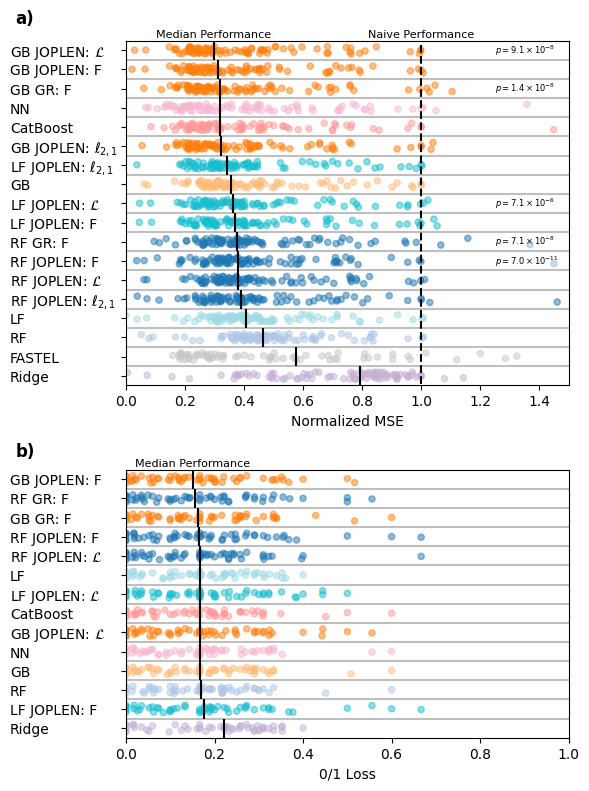

In [617]:
pval_methods = [
    "jp_linear_gb_l2L2",  # jolpen GB
    "jp_const_gb_l2",  # GR GB
    "jp_linear_rf_l2",  # joplen RF
    "jp_const_rf_l2",  # GR RF
    "jp_linear_linforest_l2L2",  # joplen LF
]

total_methods = len(reg_res["regr"]) + len(reg_res["class"])
fracs = [
    len(reg_res["regr"]) / total_methods,
    len(reg_res["class"]) / total_methods,
]

fig, axs = plt.subplots(2, 1, figsize=(6, total_methods / 4), height_ratios=fracs)

sorted_reg = scatter_pmlb("regr", axs[0])
sorted_class = scatter_pmlb("class", axs[1])

# print random text on each line
for i, method in enumerate(sorted_reg):
    if method not in pval_methods:
        continue

    pval_methods.remove(method)

    base_method = method.split("_")[2]
    if base_method == "linforest":
        base_method = "lf"
    p_val = compare_methods(method, base_method, "regr")
    mantisa, expo = f"{p_val:.1e}".split("e")
    mantisa = float(mantisa)
    expo = int(expo)

    axs[0].text(
        1.25,
        i,
        f"$p = {mantisa:.1f} \\times 10^{{{expo}}}$",
        ha="left",
        va="center",
        fontsize=6,
        bbox=dict(boxstyle="square,pad=0", fc=(1, 1, 1, 0.5), ec="none"),
    )

assert len(pval_methods) == 0, pval_methods

# plt.subplots_adjust(hspace=0.2)

axs[0].text(
    -0.25, 1.05, "a)", transform=axs[0].transAxes, fontsize=12, fontweight="bold"
)
axs[1].text(
    -0.25, 1.05, "b)", transform=axs[1].transAxes, fontsize=12, fontweight="bold"
)

plt.tight_layout()

plt.savefig(PLOT_PATH / "paper_strip.pdf")

In [618]:
# Regression
print(f'GB: {compare_methods("jp_const_gb_l2", "gb", "regr"):.4e}')
print(f'RF: {compare_methods("jp_const_rf_l2", "rf", "regr"):.4e}')

GB: 1.4237e-08
RF: 7.1115e-08


In [619]:
print(f'GB: {compare_methods("jp_linear_gb_l2L2", "gb", "regr"):.4e}')
print(f'RF: {compare_methods("jp_linear_rf_l2L2", "rf", "regr"):.4e}')
print(f'CB: {compare_methods("jp_linear_gb_l2L2", "cb", "regr"):.4e}')
print(f'LF: {compare_methods("jp_linear_linforest_l2L2", "lf", "regr"):.4e}')

GB: 9.1218e-08
RF: 2.4586e-09
CB: 2.5239e-02
LF: 7.0851e-06


In [620]:
# Classification
print(f'GB: {compare_methods("jp_linear_gb_l2L2", "gb", "class"):.4e}')

GB: 3.3356e-01


/home/matt/code/school/joplen/code/joplen-tests/my_env311/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning:

Exact p-value calculation does not work if there are zeros. Switching to normal approximation.



##### Plot 2: Synthetic nuclear norm performance

In [621]:
from JOPLEn.singletask import JOPLEn
from JOPLEn.st_penalty import NuclearNorm, SquaredFNorm, SquaredLaplacian, GroupInf1Norm
from JOPLEn.st_loss import SquaredError
from JOPLEn.partitioner import VPartition
from JOPLEn.enums import CellModel
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

n_points = 10000
n_train_points = 100
n_cells = 5
n_partitions = 20

In [622]:
np.random.seed(0)

x = np.random.uniform(-1, 1, (n_points, 2))
y = np.sin(np.pi * (x[:, 0] + x[:, 1])) + np.random.normal(0, 0.2, n_points)
# x = np.zeros((n_points, 2))
# x[:, 0] = np.random.uniform(-1, 1, (n_points))

# theta = np.radians(45)
# R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

# # Apply transformation to the points
# x = np.dot(x, R.T)
# x += np.random.normal(0, 0.2, (n_points, 2))


# y = x[:, 0] + x[:, 1] + np.random.normal(0, 0.2, n_points)

x_train = x[:n_train_points]
y_train = y[:n_train_points, None]

x_test = x[n_train_points:]
y_test = y[n_train_points:, None]

In [623]:
import plotly.graph_objs as go

trace = go.Scatter3d(
    x=x[:, 0],
    y=x[:, 1],
    z=y,
    mode="markers",
    marker=dict(size=8, color=y, colorscale="Viridis", opacity=0.8),
)

# Create layout for the plot
layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0),
)

# Create figure and add trace
fig = go.Figure(data=[trace], layout=layout)

# Show plot
fig.show()

In [624]:
# Using the f-norm
model = JOPLEn(
    partitioner=VPartition,
    n_cells=n_cells,
    n_partitions=n_partitions,
    loss_fn=SquaredError,
    cell_model=CellModel.linear,
    mu=1e-1,
    max_iters=1000,
    rescale=False,
    regularizers=[
        SquaredFNorm(1e-3),
    ],
)

history = model.fit(x_train, y_train, verbose=False)

y_pred_l2 = model.predict(x_test)

print("L2 error:", np.mean((y_pred_l2 - y_test) ** 2))

L2 error: 0.29698666195929035


In [625]:
# Using the f-norm
model = JOPLEn(
    partitioner=VPartition,
    n_cells=n_cells,
    n_partitions=n_partitions,
    loss_fn=SquaredError,
    cell_model=CellModel.constant,
    mu=1e-1,
    max_iters=1000,
    rescale=False,
    regularizers=[
        SquaredFNorm(1e-2),
    ],
)

history = model.fit(x_train, y_train, verbose=False)

y_pred_const_l2 = model.predict(x_test)

print("const L2 error:", np.mean((y_pred_const_l2 - y_test) ** 2))

const L2 error: 0.13329493054034866


In [626]:
# using the nuclear norm
model = JOPLEn(
    partitioner=VPartition,
    n_cells=n_cells,
    n_partitions=n_partitions,
    loss_fn=SquaredError,
    cell_model=CellModel.linear,
    mu=1e-1,
    max_iters=1000,
    early_stop=True,
    rescale=False,
    regularizers=[
        NuclearNorm(lam=4.7e-2),
    ],
)

history = model.fit(x_train, y_train)

y_pred_nn = model.predict(x_test)

print("NN error:", np.mean((y_pred_nn - y_test) ** 2))

NN error: 0.14845475048983198


In [627]:
# using the linf1 norm
model = JOPLEn(
    partitioner=VPartition,
    n_cells=n_cells,
    n_partitions=n_partitions,
    loss_fn=SquaredError,
    cell_model=CellModel.linear,
    mu=1e-1,
    max_iters=1000,
    early_stop=True,
    rescale=False,
    regularizers=[
        GroupInf1Norm(lam=1e-3),
    ],
)

history = model.fit(x_train, y_train)

y_pred_inf1 = model.predict(x_test)

print("Inf1 error:", np.mean((y_pred_nn - y_test) ** 2))

[00:14:07]: Epoch    100 | TrL: 0.186932 | Obj: 0.034952
[00:14:08]: Epoch    200 | TrL: 0.169615 | Obj: 0.028780
[00:14:10]: Epoch    300 | TrL: 0.163617 | Obj: 0.026780
[00:14:11]: Epoch    400 | TrL: 0.160256 | Obj: 0.025692
[00:14:12]: Epoch    500 | TrL: 0.157925 | Obj: 0.024950
[00:14:13]: Epoch    600 | TrL: 0.156101 | Obj: 0.024377
[00:14:15]: Epoch    700 | TrL: 0.154823 | Obj: 0.023979
[00:14:16]: Epoch    800 | TrL: 0.154205 | Obj: 0.023788


In [ ]:
w = model.get_weights()

print(w.shape)

np.linalg.norm(w, axis=-1)

(3, 100)


array([1.8666626e-05, 1.7742519e-05, 6.1162834e+00], dtype=float32)

In [ ]:
# using gradient boosting
model = LGBMRegressor(
    seed=0,
    verbose=-1,
    n_estimators=n_partitions,
    num_leaves=n_cells,
)

model.fit(x_train, y_train.flatten())

y_pred_lgbm = model.predict(x_test)[:, None]

print("LGBM error:", np.mean((y_pred_lgbm - y_test) ** 2))

LGBM error: 0.4578665424466753


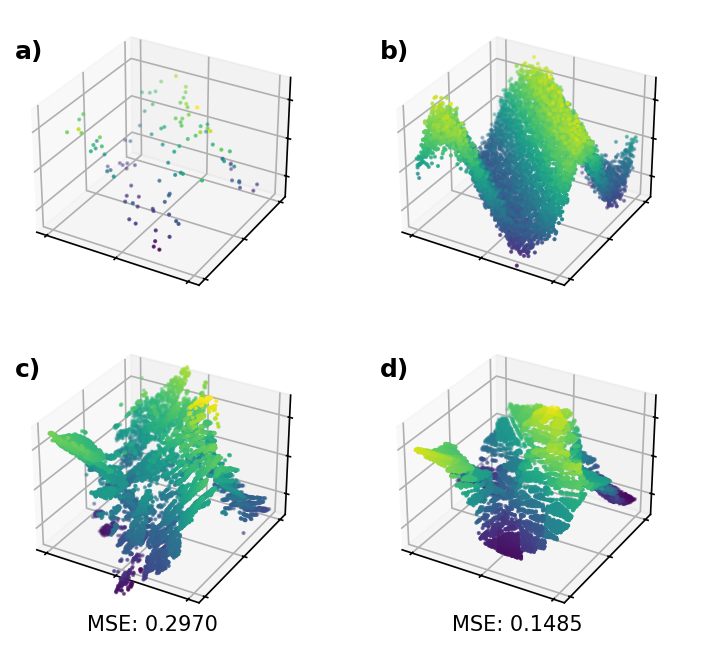

F-Norm Penalty Loss:       0.2970
Nuclear Norm Penalty Loss: 0.1485
LGBM Loss:                 0.4579


In [ ]:
# Create a figure and a grid layout with 1 row and 2 columns
fig = plt.figure(dpi=150, figsize=(6, 8))

# Add the first subplot
axs = [fig.add_subplot(321, projection="3d")]
axs += [
    fig.add_subplot(
        320 + i, projection="3d", sharex=axs[0], sharey=axs[0], sharez=axs[0]
    )
    for i in range(2, 5)
]

shared_params = {
    "s": 1,
}

axs[0].scatter(
    x_train[:, 0],
    x_train[:, 1],
    y_train,
    c=y_train,
    **shared_params,
)

axs[1].scatter(
    x_test[:, 0],
    x_test[:, 1],
    y_test,
    c=y_test,
    **shared_params,
)

axs[2].scatter(
    x_test[:, 0],
    x_test[:, 1],
    y_pred_l2,
    c=y_pred_l2,
    **shared_params,
)

axs[3].scatter(
    x_test[:, 0],
    x_test[:, 1],
    y_pred_nn,
    c=y_pred_nn,
    **shared_params,
)

axs[0].set_zlim(-1.5, 1.5)


for ax, char in zip(axs, "abcd"):
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])

    ax.text(
        0, 0, 23, f"{char})", transform=ax.transAxes, fontsize=12, fontweight="bold"
    )

for ax, pred in zip(axs[2:], [y_pred_l2, y_pred_nn]):
    score = mean_squared_error(pred, y_test)
    ax.text(
        8, 4, 0, f"MSE: {score:.4f}", transform=ax.transAxes, ha="center", va="center"
    )


# plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.1)

plt.savefig(PLOT_PATH / "synthetic_nn.pdf", bbox_inches="tight")

plt.show()

print(f"F-Norm Penalty Loss:       {np.mean((y_test - y_pred_l2) ** 2):.4f}")
print(f"Nuclear Norm Penalty Loss: {np.mean((y_test - y_pred_nn) ** 2):.4f}")
print(f"LGBM Loss:                 {np.mean((y_test - y_pred_lgbm) ** 2):.4f}")

##### Plot 2: Real-world nuclear norm performance

In [ ]:
l2_losses = reg_res["regr"]["jp_linear_gb_l2"]
n_losses = alt_reg_res["regr"]["jp_linear_gb_nn"]

where_l2_better = []
where_nn_better = []

for k, v in l2_losses.items():
    if k not in n_losses:
        continue

    norm_l2_score = v["test_score"] / v["dummy_loss"]
    norm_nn_score = n_losses[k]["test_score"] / n_losses[k]["dummy_loss"]
    ratio = norm_l2_score / norm_nn_score

    if ratio > 1 + 1e-1 and norm_nn_score < 1:
        where_nn_better.append((k, norm_l2_score / norm_nn_score))
    elif ratio < 1 - 1e-1 and norm_l2_score < 1:
        where_l2_better.append((k, norm_l2_score / norm_nn_score))

print(f"Where L2 is better: {len(where_l2_better)}")
print(f"Where NN is better: {len(where_nn_better)}")

Where L2 is better: 12
Where NN is better: 10


In [ ]:
# 228_elusage

In [ ]:
sorted(where_l2_better, key=lambda x: x[1])

[('561_cpu', 0.05742794432367193),
 ('651_fri_c0_100_25', 0.6702472381114262),
 ('230_machine_cpu', 0.6802107006286534),
 ('612_fri_c1_1000_5', 0.8552835614376728),
 ('641_fri_c1_500_10', 0.8576026814528411),
 ('609_fri_c0_1000_5', 0.8599118582091292),
 ('210_cloud', 0.8606802695990513),
 ('621_fri_c0_100_10', 0.8680570508174275),
 ('579_fri_c0_250_5', 0.8769405145209306),
 ('666_rmftsa_ladata', 0.8813768707725164),
 ('1089_USCrime', 0.8871454039684246),
 ('665_sleuth_case2002', 0.8930691323327667)]

In [ ]:
sorted(where_nn_better, key=lambda x: x[1])

[('597_fri_c2_500_5', 1.1022468622379908),
 ('586_fri_c3_1000_25', 1.1248260711732927),
 ('623_fri_c4_1000_10', 1.1258475741829521),
 ('657_fri_c2_250_10', 1.1319460654115236),
 ('505_tecator', 1.14485492738587),
 ('663_rabe_266', 1.1535101920617374),
 ('591_fri_c1_100_10', 1.1750546477442403),
 ('560_bodyfat', 1.2417368137226839),
 ('678_visualizing_environmental', 1.2849647099819246),
 ('207_autoPrice', 1.4837091149057484)]

In [ ]:
def score_ds(str_ds, str_method):
    if str_method in reg_res["regr"]:
        ds_dict = reg_res["regr"]
    else:
        ds_dict = alt_reg_res["regr"]

    tmp = ds_dict[str_method][str_ds]
    return tmp["test_score"] / tmp["dummy_loss"]


def compare_three(
    str_ds,
):
    print(str_ds)
    for method in ["jp_linear_gb_l2", "jp_linear_gb_nn", "jp_linear_gb_inf"]:
        padded_method = method.ljust(20)
        print(f"{padded_method} {score_ds(str_ds, method): 4f}")

In [ ]:
# Here, l2 norm is better because there is no feature correlation
# Barely any sparsity
# https://epistasislab.github.io/pmlb/profile/230_machine_cpu.html
compare_three("230_machine_cpu")

230_machine_cpu
jp_linear_gb_l2       0.230487
jp_linear_gb_nn       0.338847
jp_linear_gb_inf      0.332815


![](data:image/png;base64,%0AiVBORw0KGgoAAAANSUhEUgAAAXYAAAF2CAYAAAB6XrNlAAAGt0lEQVR4nO3WsYvXdRzH8fR+px3FiQ5BEoGDKE1CqEtES9AcDhEtLUFbU2N/TYTD4dJi2NIQkVA4SRLhElcEZd1ZXufd6T/x+fKBp4/HX/Ba3k/ex759840nz8V8dPnT2RMW8fDBv7MnDHd8tT57wiIuXnp59oThdnb2Zk8Y7vb1z2dPWMTx2QMAGEvYAWKEHSBG2AFihB0gRtgBYoQdIEbYAWKEHSBG2AFihB0gRtgBYoQdIEbYAWKEHSBG2AFihB0gRtgBYoQdIEbYAWKEHSBG2AFihB0gRtgBYoQdIEbYAWKEHSBG2AFihB0gRtgBYoQdIEbYAWKEHSBG2AFihB0gRtgBYoQdIEbYAWKEHSBG2AFihB0gRtgBYoQdIEbYAWKEHSBG2AFihB0gRtgBYoQdIEbYAWKEHSBG2AFihB0gZnX26rnZG4Z76+qrsycs4r/9w9kThju5av4W3/24PXvCcHdvbs2eMNyV9z6YPWERzasCeIYJO0CMsAPECDtAjLADxAg7QIywA8QIO0CMsAPECDtAjLADxAg7QIywA8QIO0CMsAPECDtAjLADxAg7QIywA8QIO0CMsAPECDtAjLADxAg7QIywA8QIO0CMsAPECDtAjLADxAg7QIywA8QIO0CMsAPECDtAjLADxAg7QIywA8QIO0CMsAPECDtAjLADxAg7QIywA8QIO0CMsAPECDtAjLADxAg7QIywA8QIO0CMsAPECDtAzOqf+3/M3jDcr+cfzZ6wiItnN2dPGO7R/sHsCYu4e3Nr9oThXnvn2uwJw21uPj97wiJ87AAxwg4QI+wAMcIOECPsADHCDhAj7AAxwg4QI+wAMcIOECPsADHCDhAj7AAxwg4QI+wAMcIOECPsADHCDhAj7AAxwg4QI+wAMcIOECPsADHCDhAj7AAxwg4QI+wAMcIOECPsADHCDhAj7AAxwg4QI+wAMcIOECPsADHCDhAj7AAxwg4QI+wAMcIOECPsADHCDhAj7AAxwg4QI+wAMcIOECPsADHCDhAj7AAxwg4QI+wAMcIOELM6fHw4e8Nwf+/+P3vCIr65sz17wnA/bH0xe8IiPv7sk9kThts/OJo9Ybivvv5l9oRF+NgBYoQdIEbYAWKEHSBG2AFihB0gRtgBYoQdIEbYAWKEHSBG2AFihB0gRtgBYoQdIEbYAWKEHSBG2AFihB0gRtgBYoQdIEbYAWKEHSBG2AFihB0gRtgBYoQdIEbYAWKEHSBG2AFihB0gRtgBYoQdIEbYAWKEHSBG2AFihB0gRtgBYoQdIEbYAWKEHSBG2AFihB0gRtgBYoQdIEbYAWKEHSBG2AFihB0gRtgBYoQdIEbYAWKEHSBG2AFiVof7R7M3DPfn77uzJyzi3q0bsycM9/q192dPWMTGidXsCcPt7u3NnjDc0cHj2RMW4WMHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoCY1V8/P5i9Ybh7v92YPWERF95+d/aE4U5urM+esIiftndmTxjulTMbsycM9+LpF2ZPWISPHSBG2AFihB0gRtgBYoQdIEbYAWKEHSBG2AFihB0gRtgBYoQdIEbYAWKEHSBG2AFihB0gRtgBYoQdIEbYAWKEHSBG2AFihB0gRtgBYoQdIEbYAWKEHSBG2AFihB0gRtgBYoQdIEbYAWKEHSBG2AFihB0gRtgBYoQdIEbYAWKEHSBG2AFihB0gRtgBYoQdIEbYAWKEHSBG2AFihB0gRtgBYoQdIEbYAWKEHSBG2AFihB0gRtgBYoQdIObY+qUPn8weMdqXD+/MnrCIM+dPz54w3NqJ5m+xtr42e8Jwp869NHvCcNvf3589YRHNqwJ4hgk7QIywA8QIO0CMsAPECDtAjLADxAg7QIywA8QIO0CMsAPECDtAjLADxAg7QIywA8QIO0CMsAPECDtAjLADxAg7QIywA8QIO0CMsAPECDtAjLADxAg7QIywA8QIO0CMsAPECDtAjLADxAg7QIywA8QIO0CMsAPECDtAjLADxAg7QIywA8QIO0CMsAPECDtAjLADxAg7QIywA8QIO0CMsAPECDtAjLADxAg7QIywA8QIO0DMUylPU1rvfJOgAAAAAElFTkSuQmCC)

In [ ]:
# Here the nuclear norm is better because it uses the redundant features to perform regularization rather than being sparse
# High degree of redundancy
# https://epistasislab.github.io/pmlb/profile/207_autoPrice.html
compare_three("207_autoPrice")

207_autoPrice
jp_linear_gb_l2       0.421894
jp_linear_gb_nn       0.284351
jp_linear_gb_inf      0.321238


![](data:image/png;base64,%0AiVBORw0KGgoAAAANSUhEUgAAAXYAAAF2CAYAAAB6XrNlAAALiUlEQVR4nO3W64+mB13G8euZme7udE9uS7s9BlbT2kahbdS2kjRSRUThFW9qwhuJYCKhKUZIWhKVlIRoUBNS4wGNwcMLCAovNBHSEk8RU9GWVrBCxdJuaV223XZmZ08zOzP+A779xXDl8/kDrty5nzvf57fY+soXdjPk6aN3Tk0nSd72aw+PbW+ceHZs+5L9h8a2k+Qj73/L2PYvPfCJse0kWT1y1dj2sVtvGtv+45+/fWw7SW4889TY9rX3f3ls+/hDbx3bTpI/ufnto/uT3vu6N45tL40tA/D/QtgBygg7QBlhBygj7ABlhB2gjLADlBF2gDLCDlBG2AHKCDtAGWEHKCPsAGWEHaCMsAOUEXaAMsIOUEbYAcoIO0AZYQcoI+wAZYQdoMzKN47eMTZ+44VnxraT5DMv/N7Y9ne+9tLY9uqRfWPbSfLGC4fGtnf+7S/GtpPk6OrK2PY1568a2z5231+ObSfJx59+zdj2L//Nx8e2tw+9a2w7Se698cfHtrc3z49tJ8nvfutLY9sudoAywg5QRtgBygg7QBlhBygj7ABlhB2gjLADlBF2gDLCDlBG2AHKCDtAGWEHKCPsAGWEHaCMsAOUEXaAMsIOUEbYAcoIO0AZYQcoI+wAZYQdoMzKgUuW59ZfPjW3nWRp8NmXlr97//MW+w+Obe9ZWoxtJ8nOzu7Y9uT3sti+OLadJM+fOju2ffnkOz9/emw7SbY3z49tL+/ZN7Y97bu3XgD8n4QdoIywA5QRdoAywg5QRtgBygg7QBlhBygj7ABlhB2gjLADlBF2gDLCDlBG2AHKCDtAGWEHKCPsAGWEHaCMsAOUEXaAMsIOUEbYAcosHn325d2p8bXzF6emkyRvOv3lse3FvkvHtpf2ro5tJ8nOmfWx7d2d7bHtJNk9d2Zs++KJ42PbS29599h2kmR3Z2x6bXtlbPv6N907tp0kG1/86Nj2zr6DY9tJsrz+4ti2ix2gjLADlBF2gDLCDlBG2AHKCDtAGWEHKCPsAGWEHaCMsAOUEXaAMsIOUEbYAcoIO0AZYQcoI+wAZYQdoIywA5QRdoAywg5QRtgBygg7QBlhByizctueU2Pjj+eyse0kuftzq2Pbp06cHttOJreTv3rg7rHtuz/wubHtJLm4eW5s+3VveMPY9h/csTO2nSQ3PPGpse3rP/To2Pbxv3tobDtJPnb1LWPbe5YWY9tJ8ls/fd/YtosdoIywA5QRdoAywg5QRtgBygg7QBlhBygj7ABlhB2gjLADlBF2gDLCDlBG2AHKCDtAGWEHKCPsAGWEHaCMsAOUEXaAMsIOUEbYAcoIO0CZxcm1jd2p8YPbG1PTSZLF9tbY9tK5tbHt3T2rY9tJcuHg1WPbq8cfG9tOksXy8tj27tLc9saVPzC2nSRX3PW+se31j94xtp27fnZuO8mHvvjc2PZ1l106tp0k913z0ti2ix2gjLADlBF2gDLCDlBG2AHKCDtAGWEHKCPsAGWEHaCMsAOUEXaAMsIOUEbYAcoIO0AZYQcoI+wAZYQdoIywA5QRdoAywg5QRtgBygg7QJnFubNnd6fGT53fnppOkrx0bm5/7/JibPuVcxfHtpPktsNbY9v/fWF1bDtJ/vWFtbHte66b+14O/NSDY9tJcvIff2ds+7n1ue/lhsOzt+Pi4ubY9u7yyth2kjyzMdcYFztAGWEHKCPsAGWEHaCMsAOUEXaAMsIOUEbYAcoIO0AZYQcoI+wAZYQdoIywA5QRdoAywg5QRtgBygg7QBlhBygj7ABlhB2gjLADlBF2gDLCDlBmceGfPrM7Nb57811T00mSN//Rf4xtn1m/MLZ96YE9Y9tJ8sG33zy2/St/+tjYdpLs7o59jvn6w58d2974wq+ObSfJ8sbJse27Pr0+tv3ITU+ObSfJ1//s82PbO1vbY9tJ8r477x/bdrEDlBF2gDLCDlBG2AHKCDtAGWEHKCPsAGWEHaCMsAOUEXaAMsIOUEbYAcoIO0AZYQcoI+wAZYQdoIywA5QRdoAywg5QRtgBygg7QBlhByizsnT48rHx49uXjm0nyYnn1sa2N146MbY97eA7Xj+2/e1//8rYdpKcfvGbY9vf/5PvGNv+9PPLY9tJ8s5D22Pb33ryv8a2V37s+rHtJHnuS8+PbS8tLca2k+SZff85tu1iBygj7ABlhB2gjLADlBF2gDLCDlBG2AHKCDtAGWEHKCPsAGWEHaCMsAOUEXaAMsIOUEbYAcoIO0AZYQcoI+wAZYQdoIywA5QRdoAywg5QZmX75LfHxlevvX1sO0nOr6+PbV9Ye2lse8/BI2PbSfIvz786tn36xW+ObSfJwau/b2x7sViMbf/wNYfHtpNkd+25se2VPatj24vV/WPbSbK2tTO2vbmzO7adJOde+Z+xbRc7QBlhBygj7ABlhB2gjLADlBF2gDLCDlBG2AHKCDtAGWEHKCPsAGWEHaCMsAOUEXaAMsIOUEbYAcoIO0AZYQcoI+wAZYQdoIywA5QRdoAywg5QZvHSQx/YnRpfvfro1HSS5Gee/ZGx7euu2D+2/eabrxzbTpJfeM+Hx7Yf/O0HxraT5Pbrvmds+/TmxbHtt14zeyNt7T00tn3izNx7ee0L/zy2nSS7O9tz22dOj20nyZ/vvXNs28UOUEbYAcoIO0AZYQcoI+wAZYQdoIywA5QRdoAywg5QRtgBygg7QBlhBygj7ABlhB2gjLADlBF2gDLCDlBG2AHKCDtAGWEHKCPsAGWEHaDMYuvJR3anxl+89o6p6STJXR/867Htc6+cGNt+5ZknxraT5BN/+OGx7Qc+NvfOk2SxtDy2/b233jC2/Zv33Dq2nSQ/tPrq2PYtv/HVse2vvvfKse0k+Yd73j+6P+mdN717bNvFDlBG2AHKCDtAGWEHKCPsAGWEHaCMsAOUEXaAMsIOUEbYAcoIO0AZYQcoI+wAZYQdoIywA5QRdoAywg5QRtgBygg7QBlhBygj7ABlhB2gjLADlFnZ/MbjY+OHjv3o2HaSvHr8qbHtsyePj20fOXbL2HaSPPLUd8a2N0+/MradJHsPv2Zs++zG5tj2kdWVse0kWWyeG92fsnNh9rkvrM/9pjvbO2PbSbJ1Zn1s28UOUEbYAcoIO0AZYQcoI+wAZYQdoIywA5QRdoAywg5QRtgBygg7QBlhBygj7ABlhB2gjLADlBF2gDLCDlBG2AHKCDtAGWEHKCPsAGWEHaDMyulnjo+NHzl/amw7Sc6enHv2S6+4fmx79cjRse0kef7kmbHt/YPvJUn2HTo0tr3/0N6x7Qvbu2PbSbKzenhs+7KjB8a2d8+fHdtOkitff8XY9s7W9th2khw4+tqxbRc7QBlhBygj7ABlhB2gjLADlBF2gDLCDlBG2AHKCDtAGWEHKCPsAGWEHaCMsAOUEXaAMsIOUEbYAcoIO0AZYQcoI+wAZYQdoIywA5QRdoAyi/d86rHdqfFP/vpDU9NJko2HHxzbPrfvsrHt9c2dse0kufxvf39se/0nfnFsO0nOXZx7N9csnx3bfjn7x7aT5PKcGdt+4vQlY9tr5y+ObSfJ3Vtfmxs/MNeAJHl677GxbRc7QBlhBygj7ABlhB2gjLADlBF2gDLCDlBG2AHKCDtAGWEHKCPsAGWEHaCMsAOUEXaAMsIOUEbYAcoIO0AZYQcoI+wAZYQdoIywA5QRdoAywg5QZnHJre/anRr/ufvvnZpOknzk+CfHtg8eu35se8+Nt41tJ8na339+bPvAD94ytp0ky1dcO7a9s/by3PZtbxvbTpKNrZ2x7cNnXxzbfnzzsrHtJLlq/56x7Y2t7bHtJLnxxKNj2y52gDLCDlBG2AHKCDtAGWEHKCPsAGWEHaCMsAOUEXaAMsIOUEbYAcoIO0AZYQcoI+wAZYQdoIywA5QRdoAywg5QRtgBygg7QBlhBygj7ABl/hd3GJZu9AiGVwAAAABJRU5ErkJggg==)

In [ ]:
# Here the performance is about the same, since the model may be either sparse or along a subspace
# https://epistasislab.github.io/pmlb/profile/678_visualizing_environmental.html
compare_three("678_visualizing_environmental")

678_visualizing_environmental
jp_linear_gb_l2       0.790094
jp_linear_gb_nn       0.614876
jp_linear_gb_inf      0.615414


![](data:image/png;base64,%0AiVBORw0KGgoAAAANSUhEUgAAAXYAAAF2CAYAAAB6XrNlAAAFyElEQVR4nO3WIU4cUBSGUYYMQSAQ3UAFC2hSMYsgFQRdMUlXUN8EgidB4JigEZMKVoHAdQHdAAJRMWq6iaYv+d45K/jFzZe7+PX1fH/Af3V2txk9YUpv91ejJ0zn43Y3esKUDkcPAODfEnaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiFlenH4bvWE6T3+OR0+Y0mq7Gz1hOr8v3foIPnaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiFn+WH8evWE6qy/fR0+Y0svz7egJ0/lwshs9YUo+doAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAmMXRp/V+9IjZbDbXoydM6ebxdfSE6fx8fxg9YUo+doAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeIEXaAGGEHiBF2gBhhB4gRdoAYYQeI+QulQRyn4H1abgAAAABJRU5ErkJggg==)

In [ ]:
# Here the performance is much better for the sparsity-promoting norm
# https://epistasislab.github.io/pmlb/profile/228_elusage.html
compare_three("228_elusage")

228_elusage
jp_linear_gb_l2       0.689451
jp_linear_gb_nn       0.676985
jp_linear_gb_inf      0.515388


![](data:image/png;base64,%0AiVBORw0KGgoAAAANSUhEUgAAAXYAAAF2CAYAAAB6XrNlAAAJR0lEQVR4nO3WQY4baR3G4XJVudru7nQmUaIERUJZoIE9SDMXYIE0qzkHZ2PLghNEYgdIA6uMUFCiCUm60922y3aZS8y/Il49zwG+13a5fvoW62//eGqKDQ8eV080249vyzeW5w/rN9aX5RurR8/KNy6f1G+8/fur0vPXj56Xnt80TfPpx7+VbyzarnyjG9blG3OYDmP5xnHclm+05QsAzErYAcIIO0AYYQcII+wAYYQdIIywA4QRdoAwwg4QRtgBwgg7QBhhBwgj7ABhhB0gjLADhBF2gDDCDhBG2AHCCDtAGGEHCCPsAGGEHSCMsAOEEXaAMP1pOpaPTPuxfKMb1uUbi7Yr32j7oXzj7PJx+Ua/rL8z9Ge1z3x/f116ftPM85+aDvvyjTk6kvJbdcOqfMONHSCMsAOEEXaAMMIOEEbYAcIIO0AYYQcII+wAYYQdIIywA4QRdoAwwg4QRtgBwgg7QBhhBwgj7ABhhB0gjLADhBF2gDDCDhBG2AHCCDtAGGEHCCPsAGH6th++9Gf4v7HouvKN03Qs35jD2XpZvjEV/1ZtW/+853j/FjN8jzk2Dtu78o22r//fzvHM3dgBwgg7QBhhBwgj7ABhhB0gjLADhBF2gDDCDhBG2AHCCDtAGGEHCCPsAGGEHSCMsAOEEXaAMMIOEEbYAcIIO0AYYQcII+wAYYQdIIywA4QRdoAwwg4Qpj+Om/KRbliXb7T9UL4xhzl+q37oyzeOh6l8owt45tNhLN9YtF35xmF7V77Rry7KN+bo4Rzc2AHCCDtAGGEHCCPsAGGEHSCMsAOEEXaAMMIOEEbYAcIIO0AYYQcII+wAYYQdIIywA4QRdoAwwg4QRtgBwgg7QBhhBwgj7ABhhB0gjLADhBF2gDDCDhCm71eX5SPtcijf2N9dl2/M8T2mw1i+Md7fl2/0y/o7w7H4t+qHden5TdM0i7Yr3ziO2/KNbliVb5ym4wwbU/nGcdyUb7ixA4QRdoAwwg4QRtgBwgg7QBhhBwgj7ABhhB0gjLADhBF2gDDCDhBG2AHCCDtAGGEHCCPsAGGEHSCMsAOEEXaAMMIOEEbYAcIIO0AYYQcII+wAYYQdIEy/v78uH2n7oXxjOozlG8fdpnxj0XblG3P8VnOY9sXfY1jXnt80zXHclm90w6p84zQdyzfm6EjbL8s3ZvmtyhcAmJWwA4QRdoAwwg4QRtgBwgg7QBhhBwgj7ABhhB0gjLADhBF2gDDCDhBG2AHCCDtAGGEHCCPsAGGEHSCMsAOEEXaAMMIOEEbYAcIIO0AYYQcII+wAYfoHv/hV+cii7co3Vg+flm+0y6F8Y7m6KN84u3xYvnFxtSrfuHz+svT89z+8Kj2/aZrm6sXX5RtzOE3HiI05LM/r3z83doAwwg4QRtgBwgg7QBhhBwgj7ABhhB0gjLADhBF2gDDCDhBG2AHCCDtAGGEHCCPsAGGEHSCMsAOEEXaAMMIOEEbYAcIIO0AYYQcII+wAYYQdIIywA4TpD+PmS3+Gn8VpOn7pj/CzOF09Ld84HsbyjfWDoXzj/Q+vSs9/8ptvSs9vmqa5ffu6fKNd1j+Lrq/fmGZ4x9u2K9/YfHxbvuHGDhBG2AHCCDtAGGEHCCPsAGGEHSCMsAOEEXaAMMIOEEbYAcIIO0AYYQcII+wAYYQdIIywA4QRdoAwwg4QRtgBwgg7QBhhBwgj7ABhhB0gjLADhBF2gDD9y99+Uz6yuliWb9x82JRvnF+elW+Mu0P5xv3Nrnzjn3/5U/nGr3//fen5Z6v6/+3ds+flG3NYnvXlG11ffw/dbfblG4f9VL7hxg4QRtgBwgg7QBhhBwgj7ABhhB0gjLADhBF2gDDCDhBG2AHCCDtAGGEHCCPsAGGEHSCMsAOEEXaAMMIOEEbYAcIIO0AYYQcII+wAYYQdIIywA4Tpbz5syke2d/vyjbuPH8o39ruvyjcO46F8481f/1y+8ctvvyvf+O+/35Sef/7V09Lzm6ZpdrfX5RttP5RvDOfn5RtzvBtz2N3Wt8qNHSCMsAOEEXaAMMIOEEbYAcIIO0AYYQcII+wAYYQdIIywA4QRdoAwwg4QRtgBwgg7QBhhBwgj7ABhhB0gjLADhBF2gDDCDhBG2AHCCDtAGGEHCCPsAGH6Tz/+o35kdVm+cdjelm9sPr4r37h586/yjRe/+0P5xvnVWfnG53fb0vN3t9el5zdN03x+97p8ox/W5RubfijfOI6b8o1F25VvTIexfMONHSCMsAOEEXaAMMIOEEbYAcIIO0AYYQcII+wAYYQdIIywA4QRdoAwwg4QRtgBwgg7QBhhBwgj7ABhhB0gjLADhBF2gDDCDhBG2AHCCDtAGGEHCCPsAGH68e66fGSajuUb+xm+x/7+pnzj6sXX5Rv90JdvDGf1G9ubn0rPX3Rd6flN0zSHzW35xmmG9y/F6Vj/W83xPNzYAcIIO0AYYQcII+wAYYQdIIywA4QRdoAwwg4QRtgBwgg7QBhhBwgj7ABhhB0gjLADhBF2gDDCDhBG2AHCCDtAGGEHCCPsAGGEHSCMsAOEEXaAMMIOEKY/Tcfykbbtyjf29zflG8vzq/KN6TCWb2xvPpVvLM/qn3m1aV//LI7jpnxjlne8H8o35ng35jDHM3djBwgj7ABhhB0gjLADhBF2gDDCDhBG2AHCCDtAGGEHCCPsAGGEHSCMsAOEEXaAMMIOEEbYAcIIO0AYYQcII+wAYYQdIIywA4QRdoAwwg4QRtgBwgg7QJi+7Yfykdt3r8s3Lp+9LN+YpmP5Rr+6LN+4ePS4fOPq8bp84z9tV3r+aYbnvTx/WL7RLuvf8Wk/lm90Q/1/ag7LixmeefkCALMSdoAwwg4QRtgBwgg7QBhhBwgj7ABhhB0gjLADhBF2gDDCDhBG2AHCCDtAGGEHCCPsAGGEHSCMsAOEEXaAMMIOEEbYAcIIO0AYYQcII+wAYYQdIEy/u3lfPnJ29aR8Y/f5Q/nGou3KN9oZNsbdoXxje7cv36h2mo7lG7ubn8o3lucPyzcO29vyjW5Yl29Mh7F8Y5aOlC8AMCthBwgj7ABhhB0gjLADhBF2gDDCDhBG2AHCCDtAGGEHCCPsAGGEHSCMsAOEEXaAMMIOEEbYAcIIO0AYYQcII+wAYYQdIIywA4QRdoAwwg4QRtgBwvwPDikzkysA5jwAAAAASUVORK5CYII=)

In [ ]:
import plotly.graph_objs as go
from pmlb import fetch_data
from pathlib import Path

# Fetch dataset
idx = (0, 1)
ds_name = "207_autoPrice"
df = fetch_data(
    ds_name, local_cache_dir=Path("..") / "datasets" / "pmlb" / "raw" / "reg"
)

# Define axis labels
axis_labels = [
    "symboling",
    "normalized-losses",
    "wheel-base",
    "length",
    "width",
    "height",
    "curb-weight",
    "engine-size",
    "bore",
    "stroke",
    "compression-ratio",
    "horsepower",
    "peak-rpm",
    "city-mpg",
    "highway-mpg",
]

# Create trace for scatter plot
trace = go.Scatter3d(
    x=df[axis_labels[idx[0]]],
    y=df[axis_labels[idx[1]]],
    z=df["target"],
    mode="markers",
    marker=dict(size=8, color=df["target"], colorscale="Viridis", opacity=0.8),
)

# Create layout for the plot
layout = go.Layout(
    scene=dict(
        xaxis=dict(title=axis_labels[idx[0]]),
        yaxis=dict(title=axis_labels[idx[1]]),
        zaxis=dict(title="target"),
    ),
    title="Target as function of ozone and temperature",
    margin=dict(l=0, r=0, b=0, t=0),
)

# Create figure and add trace
fig = go.Figure(data=[trace], layout=layout)

# Show plot
fig.show()

##### Plot 4: Multitask selection performance

In [ ]:
def plot_joplen_weights(core_weights, task_weights, axs=None):
    min_val = min(core_weights.min(), task_weights.min())
    max_val = max(core_weights.max(), task_weights.max())

    n_tasks, n_feats, n_cells = core_weights.shape
    core_weights = core_weights.transpose(1, 0, 2).reshape(n_feats, -1)
    task_weights = task_weights.transpose(1, 0, 2).reshape(n_feats, -1)

    core_weights = scale_matrix(core_weights, min_val, max_val)
    task_weights = scale_matrix(task_weights, min_val, max_val)

    if axs is None:
        fig, axs = plt.subplots(2, 1, figsize=(10, 5), sharey=True, sharex=True)

    params = {"aspect": "auto", "vmin": -1, "vmax": 1, "cmap": "seismic"}

    axs[0].matshow(core_weights, **params)
    # axs[0].set_title("Common weights")
    axs[1].matshow(task_weights, **params)
    # axs[1].set_title("Task-specific weights")

    # create a vertical line between each task
    for ax in axs:
        for i in range(n_tasks - 1):
            ax.axvline((i + 1) * n_cells, color="k", linewidth=1, alpha=0.25)

    for ax in axs:
        ax.set_ylabel("Features")

    axs[1].set_xlabel("Tasks, partitions, and cells")

    plt.tight_layout()

    return ax

In [ ]:
import pandas as pd

OUT_PATH = Path() / "experiments" / "manual" / "multitask"


# load data
def load_results(dataset):
    path = OUT_PATH / dataset

    # prediction performance
    jp_res = pd.read_csv(path / "joplen.csv", index_col=0)
    dl_res = pd.read_csv(path / "dl.csv", index_col=0)
    dummy_results = pd.read_csv(path / "dummy.csv", index_col=0)
    linear_results = pd.read_csv(path / "linear.csv", index_col=0)
    gb_results = pd.read_csv(path / "gb.csv", index_col=0)

    # weights
    jp_path = path / "joplen"
    jp_core = np.load(jp_path / "core.npy")
    jp_task = np.load(jp_path / "task.npy")

    dl_path = path / "dirty_lasso"
    dl_core = np.load(dl_path / "core.npy")
    dl_task = np.load(dl_path / "task.npy")

    return (
        jp_res,
        dl_res,
        dummy_results,
        linear_results,
        gb_results,
        jp_core,
        jp_task,
        dl_core,
        dl_task,
    )

In [ ]:
(
    sarcos_jp_res,
    sarcos_dl_res,
    sarcos_dummy_results,
    sarcos_linear_results,
    sarcos_gb_results,
    sarcos_jp_core,
    sarcos_jp_task,
    sarcos_dl_core,
    sarcos_dl_task,
) = load_results("sarcos")

(
    nano_jp_res,
    nano_dl_res,
    nano_dummy_results,
    nano_linear_results,
    nano_gb_results,
    nano_jp_core,
    nano_jp_task,
    nano_dl_core,
    nano_dl_task,
) = load_results("nanoparticle")

In [ ]:
def scale_matrix(matrix, min_val, max_val):
    # Create an empty matrix of the same shape to store the scaled values
    scaled_matrix = np.zeros_like(matrix)

    assert min_val < 0 and max_val > 0, "min_val and max_val must have opposite signs"

    abs_max = max(abs(min_val), abs(max_val))

    # Handle negative and zero values
    neg_mask = matrix <= 0
    scaled_matrix[neg_mask] = matrix[neg_mask] / abs_max

    # Handle positive values
    pos_mask = matrix > 0
    scaled_matrix[pos_mask] = matrix[pos_mask] / abs_max

    return scaled_matrix


def plot_joplen_weights(core_weights, task_weights, exclude_bias, axs=None):
    if exclude_bias:
        core_weights = core_weights[:, :-1]
        task_weights = task_weights[:, :-1]

    min_val = min(core_weights.min(), task_weights.min())
    max_val = max(core_weights.max(), task_weights.max())

    n_tasks, n_feats, n_cells = core_weights.shape
    core_weights = core_weights.transpose(1, 0, 2).reshape(n_feats, -1)
    task_weights = task_weights.transpose(1, 0, 2).reshape(n_feats, -1)

    core_weights = scale_matrix(core_weights, min_val, max_val)
    task_weights = scale_matrix(task_weights, min_val, max_val)

    # make the background white
    core_weights[core_weights == 0] = np.nan
    task_weights[task_weights == 0] = np.nan

    if axs is None:
        fig, axs = plt.subplots(2, 1, figsize=(8, 3), sharey=True, sharex=True)

    params = {"aspect": "auto", "vmin": -1, "vmax": 1, "cmap": "seismic"}

    axs[0].matshow(core_weights, **params)
    # axs[0].set_title("Common weights")
    axs[1].matshow(task_weights, **params)
    # axs[1].set_title("Task-specific weights")

    # create a vertical line between each task
    for ax in axs:
        for i in range(n_tasks - 1):
            ax.axvline((i + 1) * n_cells, color="k", linewidth=1, alpha=0.25)

    # axs[1].set_xticks(np.arange(n_tasks) * n_cells + n_cells / 2)
    # axs[1].set_xticklabels([f"Task {i + 1}" for i in range(n_tasks)])

    axs2 = axs[1].twiny()
    axs2.spines["top"].set_position(("axes", -0.1))
    axs2.tick_params("both", length=0, width=0, which="minor")
    # axs2.tick_params("both", direction="in", which="major")
    axs2.xaxis.set_ticks_position("top")
    # axs2.tick_params(direction="out", axis="x")
    ticks = np.arange(n_tasks + 1) * n_cells
    axs2.set_xticks(ticks)
    axs2.set_xticklabels([])
    halfway_points = (ticks[1:] + ticks[:-1]) / 2
    axs2.xaxis.set_minor_locator(plt.FixedLocator(halfway_points))
    axs2.xaxis.set_minor_formatter(
        plt.FuncFormatter(lambda x, _: f"T{int(x / n_cells + 1)}")
    )
    axs2.tick_params(axis="x", which="minor", pad=-15)  # Increase pad for more offse

    for ax in axs:
        ax.set_xticks([])

    # for ax in axs:
    #     ax.set_ylabel("Features")
    axs[0].set_ylabel("Common ($\\mathbf{B}$)")
    axs[1].set_ylabel("Task-specific ($\\mathbf{A}$)")

    axs[1].set_xlabel("Index of weights", labelpad=25)

    # plt.tight_layout()

    return ax

In [ ]:
def count_n_feats(core_mask, task_mask):
    task_mask = task_mask & ~core_mask[None, :]

    n_core_feats = np.sum(core_mask)
    n_task_feats = np.sum(task_mask, axis=1)

    return n_core_feats, n_task_feats


def jp_n_feats(core_weights, task_weights):
    core_mask = np.linalg.norm(core_weights[:, :-1], axis=(0, 2)) > 1e-4
    task_mask = np.linalg.norm(task_weights[:, :-1], axis=2) > 1e-4

    return count_n_feats(core_mask, task_mask)


def dl_n_feats(core_weights, task_weights):
    core_mask = np.linalg.norm(core_weights.T, axis=0) > 1e-4
    task_mask = np.abs(task_weights.T) > 1e-4

    return count_n_feats(core_mask, task_mask)

In [ ]:
n_feats = {
    "sarcos": {
        "dl": {
            "common": dl_n_feats(sarcos_dl_core, sarcos_dl_task)[0],
            "task": dl_n_feats(sarcos_dl_core, sarcos_dl_task)[1],
        },
        "jp": {
            "common": jp_n_feats(sarcos_jp_core, sarcos_jp_task)[0],
            "task": jp_n_feats(sarcos_jp_core, sarcos_jp_task)[1],
        },
    },
    "nano": {
        "dl": {
            "common": dl_n_feats(nano_dl_core, nano_dl_task)[0],
            "task": dl_n_feats(nano_dl_core, nano_dl_task)[1],
        },
        "jp": {
            "common": jp_n_feats(nano_jp_core, nano_jp_task)[0],
            "task": jp_n_feats(nano_jp_core, nano_jp_task)[1],
        },
    },
}

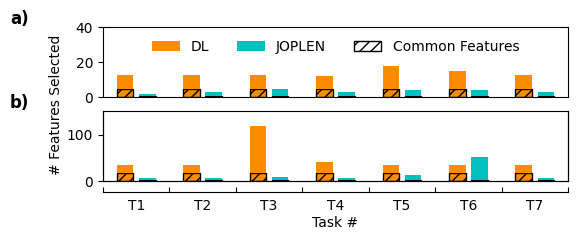

In [ ]:
from matplotlib.patches import Patch

fig, axs = plt.subplots(2, 1, figsize=(6, 2), sharey=False, sharex=False)

for i, (method, color) in enumerate(zip(["dl", "jp"], ["darkorange", "c"])):
    for ax, ds_name in zip(axs, ["sarcos", "nano"]):
        n_common = n_feats[ds_name][method]["common"]
        n_tasks = len(n_feats[ds_name][method]["task"])

        # common features
        ax.bar(
            np.arange(n_tasks) + i / 3,
            [n_common] * n_tasks,
            width=0.25,
            color=[color] * n_tasks,
            hatch="///",
            edgecolor="k",
        )

        # task-specific features
        ax.bar(
            np.arange(n_tasks) + i / 3,
            n_feats[ds_name][method]["task"] + n_common,
            bottom=n_common,
            width=0.25,
            color=[color] * n_tasks,
        )

axs[0].set_ylim(0, 40)
axs[1].set_ylim(0, 150)

# add shared y label
axs[0].text(
    -0.1,
    -0.1,
    "# Features Selected",
    transform=axs[0].transAxes,
    rotation=90,
    va="center",
    ha="center",
)

for ax, letter in zip(axs, "ab"):
    ax.text(
        -0.2, 1.05, letter + ")", transform=ax.transAxes, fontsize=12, fontweight="bold"
    )

legend_handles = [
    Patch(facecolor="darkorange", label="DL"),
    Patch(facecolor="c", label="JOPLEN"),
    Patch(facecolor="w", edgecolor="k", hatch="///", label="Common Features"),
]

axs[0].legend(handles=legend_handles, loc="upper center", ncol=3, frameon=False)

for ax in axs:
    ax.set_xlim(-1 / 3, n_tasks - 1 / 3)
    ax.set_xticklabels([])
    ax.set_xticks([])


axs2 = axs[1].twiny()
axs2.spines["top"].set_position(("axes", -0.15))
axs2.tick_params("both", length=0, width=0, which="minor")
# axs2.tick_params("both", direction="in", which="major")
axs2.xaxis.set_ticks_position("top")
# axs2.tick_params(direction="out", axis="x")
ticks = np.arange(n_tasks + 1)
axs2.set_xticks(ticks)
axs2.set_xticklabels([])
halfway_points = (ticks[1:] + ticks[:-1]) / 2
axs2.xaxis.set_minor_locator(plt.FixedLocator(halfway_points))
axs2.xaxis.set_minor_formatter(plt.FuncFormatter(lambda x, _: f"T{int(x + 1)}"))
axs2.tick_params(axis="x", which="minor", pad=-15)  # Increase pad for more offse

for ax in axs:
    ax.set_xticks([])

axs[1].set_xlabel("Task #", labelpad=25)

plt.savefig(PLOT_PATH / "features_selected.pdf", bbox_inches="tight")

In [ ]:
# print the total number of features
for ds_name, ds_info in n_feats.items():
    print(ds_name)
    for method_name, info in ds_info.items():
        print(method_name, info["common"] + info["task"])

sarcos
dl [ 8  8  8  7 13 10  8]
jp [1 2 4 2 3 3 2]
nano
dl [ 17  17 102  24  17  17  18]
jp [ 3  3  7  3 10 50  3]


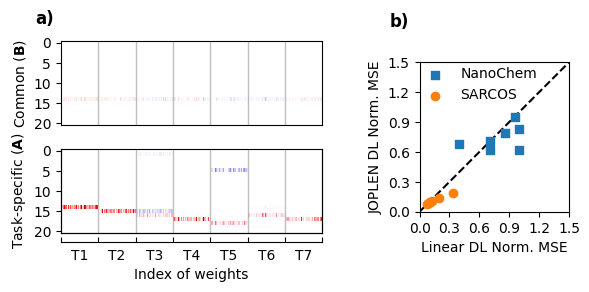

In [ ]:
# Create figure and gridspec
fig = plt.figure(figsize=(6, 3.5))
gs = plt.GridSpec(2, 2, width_ratios=[1.75, 1], height_ratios=[1, 1])

# Plot in the first row
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])

plot_joplen_weights(sarcos_jp_core, sarcos_jp_task, exclude_bias=True, axs=[ax1, ax2])

# Square plot to the right
ax3 = fig.add_subplot(gs[:, 1])

ax3.scatter(
    nano_dl_res["test"] / nano_dummy_results["test"],
    nano_jp_res["test"] / nano_dummy_results["test"],
    label="NanoChem",
    marker="s",
    zorder=10,
)

ax3.scatter(
    sarcos_dl_res["test"] / sarcos_dummy_results["test"],
    sarcos_jp_res["test"] / sarcos_dummy_results["test"],
    label="SARCOS",
    marker="o",
    zorder=10,
)

x = np.linspace(0, 1.5, 6, endpoint=True)

ax3.plot(x, x, color="k", linestyle="--", zorder=0)

ax3.set_aspect("equal")

ax3.set_xticks(x)
ax3.set_yticks(x)

ax3.set_xlabel("Linear DL Norm. MSE")
ax3.set_ylabel("JOPLEN DL Norm. MSE")
ax3.legend(frameon=False, bbox_to_anchor=(0.4, 0.85), loc="center")
ax3.set_xlim(0, 1.5)
ax3.set_ylim(0, 1.5)

# ax1.set_title("SARCOS weights")
# ax3.set_title("Performance comparison")

# add subplot text
ax1.text(-0.1, 1.2, "a)", transform=ax1.transAxes, fontsize=12, fontweight="bold")
ax1.text(-0.2, 1.24, "b)", transform=ax3.transAxes, fontsize=12, fontweight="bold")

plt.tight_layout()

plt.savefig("plots/mt_perf.pdf", bbox_inches="tight")

plt.show()